In [2]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv("Fertilizer Prediction.csv")
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [12]:
df_sand=df["Soil Type"]
soil_set=set()
for i in df_sand:
    soil_set.add(i)
soil_set=list(sorted(soil_set))
soil_set

['Black', 'Clayey', 'Loamy', 'Red', 'Sandy']

In [14]:
soil_class={}
for i,soil in enumerate(soil_set):
    soil_class[soil]=i
soil_class


{'Black': 0, 'Clayey': 1, 'Loamy': 2, 'Red': 3, 'Sandy': 4}

In [16]:
df_sand=df["Crop Type"]
crop_set=set()
for i in df_sand:
    crop_set.add(i)
crop_set=list(sorted(crop_set))
crop_set

['Barley',
 'Cotton',
 'Ground Nuts',
 'Maize',
 'Millets',
 'Oil seeds',
 'Paddy',
 'Pulses',
 'Sugarcane',
 'Tobacco',
 'Wheat']

In [17]:
crop_class={}
for i,crop in enumerate(crop_set):
    crop_class[crop]=i
crop_class

{'Barley': 0,
 'Cotton': 1,
 'Ground Nuts': 2,
 'Maize': 3,
 'Millets': 4,
 'Oil seeds': 5,
 'Paddy': 6,
 'Pulses': 7,
 'Sugarcane': 8,
 'Tobacco': 9,
 'Wheat': 10}

In [18]:
df["Crop"]=df["Crop Type"].map(crop_class)

In [19]:
df["Soil"]=df["Soil Type"].map(soil_class)

In [21]:
df1=df.copy()
df1=df1.drop(["Crop Type","Soil Type"],axis="columns")

In [22]:
df1

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop,Soil
0,26,52,38,37,0,0,Urea,3,4
1,29,52,45,12,0,36,DAP,8,2
2,34,65,62,7,9,30,14-35-14,1,0
3,32,62,34,22,0,20,28-28,9,3
4,28,54,46,35,0,0,Urea,6,1
...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,28-28,7,1
95,30,60,27,4,17,17,10-26-26,9,3
96,38,72,51,39,0,0,Urea,10,2
97,36,60,43,15,0,41,DAP,4,4


In [24]:
X=df1.drop(["Fertilizer Name"],axis="columns")
X

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Crop,Soil
0,26,52,38,37,0,0,3,4
1,29,52,45,12,0,36,8,2
2,34,65,62,7,9,30,1,0
3,32,62,34,22,0,20,9,3
4,28,54,46,35,0,0,6,1
...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,7,1
95,30,60,27,4,17,17,9,3
96,38,72,51,39,0,0,10,2
97,36,60,43,15,0,41,4,4


In [25]:
Y=df1["Fertilizer Name"]
Y

0         Urea
1          DAP
2     14-35-14
3        28-28
4         Urea
        ...   
94       28-28
95    10-26-26
96        Urea
97         DAP
98       20-20
Name: Fertilizer Name, Length: 99, dtype: object

In [26]:
Y.value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X.values,Y,test_size=0.2,stratify=Y)

In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
rf.score(x_test,y_test)

1.0

In [31]:
y_pred=rf.predict(x_test)

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         3
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         3
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         4
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [36]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 5]])

<Axes: >

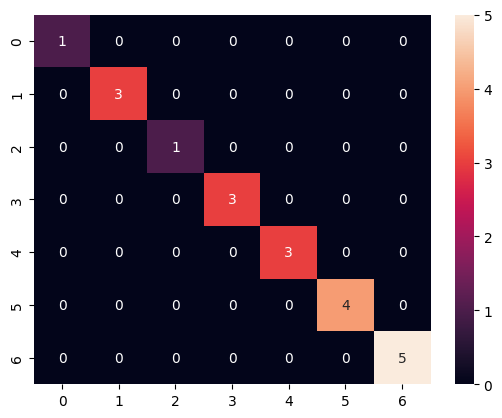

In [37]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm,annot=True)

In [41]:
rf.predict([[26,52,38,37,0,0,3,4]])

array(['Urea'], dtype=object)

In [40]:
df1

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Crop,Soil
0,26,52,38,37,0,0,Urea,3,4
1,29,52,45,12,0,36,DAP,8,2
2,34,65,62,7,9,30,14-35-14,1,0
3,32,62,34,22,0,20,28-28,9,3
4,28,54,46,35,0,0,Urea,6,1
...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,28-28,7,1
95,30,60,27,4,17,17,10-26-26,9,3
96,38,72,51,39,0,0,Urea,10,2
97,36,60,43,15,0,41,DAP,4,4


In [2]:
import pickle

In [39]:
with open("fertilizer_model.pkl","wb") as f:
    pickle.dump(rf,f)

In [ ]:
import json
soil_type={
    "soil_type":[soil.lower() for soil in soil_set]
}
with open("soil_type.json","w") as f1:
    f1.write(json.dumps(soil_type))

In [ ]:
crop_type={
    "crop_type":[crop.lower() for crop in crop_set]
}
with open("crop_type.json","w") as f1:
    f1.write(json.dumps(crop_type))

In [3]:
with open("fertilizer_model.pkl","rb") as f:
    model=pickle.load(f)

In [11]:
model.predict([[19,62,45,18,0,0,1,6]])

array(['20-20'], dtype=object)